In [1]:
import numpy as np  
import matplotlib.pyplot as plt
np.random.seed(0)

# Least-Squares Optimization

Lets solve a Linear Regression model with Least-Squares. 


- **Model**:
  
  The linear regression model is defined as 
  \begin{equation}
  h_\boldsymbol{\theta} = \mathbf{x}^T \boldsymbol{\theta}
  \end{equation}
where $\boldsymbol{\theta}$ is the parameter vector and $\mathbf{x}$ is the feature vector.
  
  
**Cost Functional**:

  The least squares cost function is given by
  \begin{equation}
    J(\boldsymbol{\theta}) = \frac{1}{2m} \sum_{i=1}^m \Big(r^{(i)}(\boldsymbol{\theta}) \Big)^2= \frac{1}{2m} \sum_{i=1}^m \Big( h_\boldsymbol{\theta}(\mathbf{x}^{(i)}) - y^{(i)} \Big)^2
  \end{equation}
  where 
- $m$: the number of training examples.
- $r^{(i)}= h_\boldsymbol{\theta}(x^{(i)}) - y^{(i)}$ is the residual.
- $\mathbf{x}^{(i)}$ is the $i$-th input.
- $y^{(i)}$ is the corresponding target value.

**Gradient**

  The derivative of $J(\boldsymbol{\theta})$ with respect to the parameter $\theta_j$ is (Least-Squares):
  \begin{equation}
    \frac{\partial J(\boldsymbol{\theta})}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \Big( h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)}) - y^{(i)} \Big) x_j^{(i)}.
  \end{equation}
  In vectorized form, the gradient is written as:
  \begin{equation} 
  \nabla J(\boldsymbol{\theta}) = \frac{1}{m} X^T \big( X\boldsymbol{\theta} - \boldsymbol{y} \big) = \frac{1}{m} X^T  \boldsymbol{r},
  \end{equation}
  where $X$ is the matrix with data, $\boldsymbol{y}$ is the vector of target values and $\boldsymbol{r}$ is the vector of residuals.

  ---

Given a set of labeled data $\boldsymbol{x},\boldsymbol{y}$, we will implement 5 optimization algorithms to compute the Least-Squares solution. **Remark**: We know it has an analytical solution.

- We use our Linear Regression function to compute the analytical values.

In [2]:
def linear_regression(X, Y):
    X_mean = X.mean()
    Y_mean = Y.mean()
    numerator = np.sum((X - X_mean) * (Y - Y_mean))
    denominator = np.sum((X - X_mean) ** 2)
    w = numerator / denominator
    b = Y_mean - w * X_mean
    return np.array([[b], [w]])

- We generate some sinthetic data to test each optimizer individually.

In [3]:
    m_examples_individual = 100

    b_true_individual = 4.0
    w_true_individual = 3.0 

    # Generate synthetic data
    X_individual = 2 * np.random.rand(m_examples_individual, 1)
    y_individual = b_true_individual + w_true_individual * X_individual + np.random.randn(m_examples_individual, 1)

    # Add bias term to X to create design matrix
    X_b_individual = np.c_[np.ones((m_examples_individual, 1)), X_individual]

    # Compute analytic solution
    theo_theta_individual = linear_regression(X_individual, y_individual)

# Exercise 1: Gradient Descent

Implement a function named `gradient_descent` that implements an easy version of the gradient descent optimization algorithm for linear regression.

**INPUTS**:

- **X**: The training data matrix where each row represents a training example.
- **y**: The corresponding target values.
- **theta**: The initial parameters (weights) to be optimized.
- **learning_rate**: The step size used for updating the parameters.
- **iterations**: The maximum number of iterations to run.

---
**INITIALIZATION**:
- Determine the number of training examples, denoted by $m$.
- The parameters $\boldsymbol{\theta}$ are initialized with the provided initial guess.

---
**MAIN LOOP** (for a given number of iterations):
- **Prediction Computation**: Compute the predictions using the linear model:
  
  \begin{equation}
  \text{predictions} = X \boldsymbol{\theta}
  \end{equation}
  
- **Error Calculation**: Compute the residuals as the difference between the predictions and the actual target values:
  
  \begin{equation}
  \text{residuals} = \text{predictions} - y
  \end{equation}
  
- **Gradient Computation**: Compute the gradient of the cost function (mean squared error) with respect to $\boldsymbol{\theta}$:
  
  \begin{equation}
  \nabla J(\boldsymbol{\theta}) = \frac{1}{m} X^T (\text{residuals})
  \end{equation}
  
- **Parameter Update**: Update the parameters using the gradient descent update rule:
  
  \begin{equation}
  \boldsymbol{\theta} \leftarrow \boldsymbol{\theta} - \text{learning\_rate} \cdot \nabla J(\boldsymbol{\theta})
  \end{equation}

---  
**OUTPUT**:
The function returns the optimized parameter vector $\boldsymbol{\theta}$.

---


In [4]:
# -------------------------
# Gradient Descent
# -------------------------
def gradient_descent(X, y, theta, learning_rate, iterations):
    # Number of training examples
    m = len(y)
    
    # Loop over the specified number of iterations
    for _ in range(iterations):
        
        # Compute predictions by taking the dot product of X and w
        predictions = np.dot(X, theta)
        
        # Compute residuals as the difference between predictions and y
        residuals = predictions - y
        
        # Compute the gradient: (X^T * residuals) divided by the number of examples
        gradient = np.dot(X.T, residuals) / m
        
        # Update the weights by subtracting the product of learning rate and gradient
        theta = theta - learning_rate * gradient
        
    # Return the optimized weights
    return theta


- Test the algorithm.

In [5]:
    # Initialize parameters randomly if not provided
    theta_initial_ind = np.array([[1.0], [1.0]])
    learning_rate_ind = 0.003
    nr_iterations_inv = 1000

    # Run optimization method
    theta_individual = gradient_descent(X_b_individual, y_individual, theta_initial_ind, learning_rate_ind, nr_iterations_inv)

    print("=============== GD ==================")
    print("True Parameters (b, w):")
    print(np.array([[b_true_individual], [w_true_individual]]))
    print("===================================\n")
    print("Theoretical Parameters (b, w):")
    print(theo_theta_individual)
    print("===================================\n")
    print("Initial Parameters (b, w):")
    print(theta_initial_ind)
    print("===================================\n")
    print("Obtained Parameters (b, w):")
    print(theta_individual)
    print("===================================\n")

# # OUTPUT: 
# =============== GD ==================
# True Parameters (b, w):
# [[4.]
#  [3.]]
# ===================================

# Theoretical Parameters (b, w):
# [[4.22215108]
#  [2.96846751]]
# ===================================

# Initial Parameters (b, w):
# [[1.]
#  [1.]]
# ===================================

# Obtained Parameters (b, w):
# [[3.70807238]
#  [3.41498547]]
# ===================================

=============== GD ==================
True Parameters (b, w):
[[4.]
 [3.]]

Theoretical Parameters (b, w):
[[4.22215108]
 [2.96846751]]

Initial Parameters (b, w):
[[1.]
 [1.]]

Obtained Parameters (b, w):
[[3.70807238]
 [3.41498547]]



# Exercise 2: Stochastic Gradient Descent

Implement a function named `stochastic_gradient_descent` that implements the stochastic gradient descent optimization algorithm for linear regression.

---

**INPUTS**:

- **X**: The training data matrix where each row represents a training example.
- **y**: The corresponding target values.
- **theta**: The initial parameters (weights) to be optimized.
- **learning_rate**: The step size for updating the parameters.
- **iterations**: The maximum number of iterations to run.

---

**INITIALIZATION**:
- Determine the number of training examples, denoted by $m$.

---

**MAIN LOOP** (for a given number of iterations):
- **Loop over the specified number of iterations.**
  - **Inner Loop (over each training example)**:
    - Select a random index from the dataset (from $0$ to $m-1$).
    - Extract the training example at the random index and reshape it as a row vector, denoted by $\mathbf{x}_i$.
    - Extract the corresponding label $y_i$ for the selected training example.
    - **Prediction Computation**: Compute the prediction for the selected example:
      \begin{equation}
      \text{prediction} = \mathbf{x}_i \cdot \boldsymbol{\theta}
      \end{equation}
    - **Residuals Calculation**: Compute the residuals (error) as:
      \begin{equation}
      \text{residuals} = \text{prediction} - y_i
      \end{equation}
    - **Gradient Computation**: Compute the gradient for the selected example:
      \begin{equation}
      \text{gradient} = \mathbf{x}_i^T \cdot \text{residuals}
      \end{equation}
    - **Parameter Update**: Update the parameters using the gradient descent update rule:
      \begin{equation}
      \boldsymbol{\theta} \leftarrow \boldsymbol{\theta} - \text{learning\_rate} \times \text{gradient}
      \end{equation}

---

**OUTPUT**:
The function returns the optimized parameter vector $\boldsymbol{\theta}$.

---

- Implement the Stochastic Gradient Descent Method

In [6]:
# -------------------------
# Stochastic Gradient Descent
# -------------------------
def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    # Number of training examples. This way we do it through all of them.
    m = len(y)
    
    # Loop over the specified number of iterations
    for _ in range(iterations):
        
        # Loop over each training example
        for i in range(m):
            
            # Select a random index from the dataset
            rand_index = np.random.randint(0, m)
            
            # Extract the training example at the random index and reshape it as a row vector
            X_i = X[rand_index, :].reshape(1, -1)
            
            # Extract the corresponding label for the selected training example
            y_i = y[rand_index]
            
            # Compute the prediction for the selected training example
            prediction = np.dot(X_i, theta)
            
            # Compute the residuals for the selected example
            residuals = prediction - y_i
            
            # Compute the gradient for the selected example
            gradient = np.dot(X_i.T, residuals)
            
            # Update the parameters by subtracting the product of learning rate and gradient
            theta = theta - learning_rate * gradient
            
    # Return the optimized parameters
    return theta


In [7]:
    # Initialize parameters randomly if not provided
    theta_initial_ind = np.array([[1.0], [1.0]])
    learning_rate_ind = 0.003
    nr_iterations_inv = 1000

    # Run optimization method
    theta_individual = stochastic_gradient_descent(X_b_individual, y_individual, theta_initial_ind, learning_rate_ind, nr_iterations_inv)

    print("=============== SGD ==================")
    print("True Parameters (b, w):")
    print(np.array([[b_true_individual], [w_true_individual]]))
    print("===================================\n")
    print("Theoretical Parameters (b, w):")
    print(theo_theta_individual)
    print("===================================\n")
    print("Initial Parameters (b, w):")
    print(theta_initial_ind)
    print("===================================\n")
    print("Obtained Parameters (b, w):")
    print(theta_individual)
    print("===================================\n")

# OUTPUT:
# =============== SGD ==================
# True Parameters (b, w):
# [[4.]
#  [3.]]
# ===================================

# Theoretical Parameters (b, w):
# [[4.22215108]
#  [2.96846751]]
# ===================================

# Initial Parameters (b, w):
# [[1.]
#  [1.]]
# ===================================

# Obtained Parameters (b, w):
# [[4.23157379]
#  [3.04690077]]
# ===================================

=============== SGD ==================
True Parameters (b, w):
[[4.]
 [3.]]

Theoretical Parameters (b, w):
[[4.22215108]
 [2.96846751]]

Initial Parameters (b, w):
[[1.]
 [1.]]

Obtained Parameters (b, w):
[[4.23157379]
 [3.04690077]]




# Exercise 3: RMSprop Optimizer

Implement a function named `rmsprop` that applies the RMSprop optimization algorithm to minimize a cost function in the context of linear regression.

---

**INPUTS**:

- **X**: The training data matrix where each row represents a training example.
- **y**: The corresponding target values.
- **theta**: The initial parameters (weights) to be optimized.
- **learning_rate**: The step size for updating the parameters.
- **iterations**: The maximum number of iterations to run.
- **beta** (default 0.9): The exponential decay rate for the moving average of squared gradients.
- **epsilon** (default 1e-7): A small constant added to the denominator for numerical stability.

---

**INITIALIZATION**:
- Initialize the moving average of squared gradients, denoted by $v_t$, as a zero vector (with the same shape as $\boldsymbol{\theta}$).
- Determine the number of training examples, denoted by $m$.

---

**MAIN LOOP** (for a given number of iterations):
- **Prediction Computation**:  
  Compute the predictions as:
  \begin{equation}
  \text{predictions} = X \, \boldsymbol{\theta}
  \end{equation}
  
- **Residuals Calculation**:  
  Compute the residuals (errors) as the difference between predictions and the actual target values:
  \begin{equation}
  \text{residuals} = \text{predictions} - y
  \end{equation}
  
- **Gradient Computation**:  
  Compute the gradient of the cost function as:
  \begin{equation}
  \text{gradient} = \frac{1}{m} X^T \, \text{residuals}
  \end{equation}
  
- **Update Moving Average**:  
  Update the exponentially decaying average of the squared gradients:
  \begin{equation}
  v_t \leftarrow \beta \, v_t + (1 - \beta) \, (\nabla_t J)^2
  \end{equation}
  
- **Parameter Update**:  
  Update the parameters using the RMSprop rule:
  \begin{equation}
  \boldsymbol{\theta} \leftarrow \boldsymbol{\theta} - \frac{\text{learning\_rate}}{\sqrt{v_t} + \epsilon} \, \text{gradient}
  \end{equation}

---

**OUTPUT**:
The function returns the optimized parameter vector $\boldsymbol{\theta}$.

---

- Implement the rmsprop method.

In [8]:
# -------------------------
# RMSprop Optimizer
# -------------------------
def rmsprop(X, y, theta, learning_rate, iterations, beta=0.9, epsilon=1e-7):
    # Initialize the moving average of squared gradients with zeros (same shape as theta)
    v_t = np.zeros_like(theta)
    
    # Number of training examples
    m = len(y)
    
    # Loop over the specified number of iterations
    for _ in range(iterations):
        
        # Compute predictions as the dot product of X and theta
        predictions = np.dot(X, theta)
        
        # Compute residuals as the difference between predictions and y
        residuals = predictions - y
        
        # Compute the gradient as the dot product of X^T and residuals divided by m
        gradient = np.dot(X.T, residuals) / m
        
        # Update the exponentially decaying average of squared gradients
        v_t = beta * v_t + (1 - beta) * (gradient ** 2)
        
        # Update the parameters using the RMSprop update rule
        theta = theta - (learning_rate / (np.sqrt(v_t) + epsilon)) * gradient
        
    # Return the optimized parameters
    return theta


In [9]:
    # Initialize parameters randomly if not provided
    theta_initial_ind = np.array([[1.0], [1.0]])
    learning_rate_ind = 0.003
    nr_iterations_inv = 1000

    # Run optimization method
    theta_individual = rmsprop(X_b_individual, y_individual, theta_initial_ind, learning_rate_ind, nr_iterations_inv)

    print("=============== RMSPROP==============")
    print("True Parameters (b, w):")
    print(np.array([[b_true_individual], [w_true_individual]]))
    print("===================================\n")
    print("Theoretical Parameters (b, w):")
    print(theo_theta_individual)
    print("===================================\n")
    print("Initial Parameters (b, w):")
    print(theta_initial_ind)
    print("===================================\n")
    print("Obtained Parameters (b, w):")
    print(theta_individual)
    print("===================================\n")

# OUTPUT:
# =============== RMSPROP==============
# True Parameters (b, w):
# [[4.]
#  [3.]]
# ===================================

# Theoretical Parameters (b, w):
# [[4.22215108]
#  [2.96846751]]
# ===================================

# Initial Parameters (b, w):
# [[1.]
#  [1.]]
# ===================================

# Obtained Parameters (b, w):
# [[3.91398865]
#  [3.20723111]]
# ===================================

=============== RMSPROP==============
True Parameters (b, w):
[[4.]
 [3.]]

Theoretical Parameters (b, w):
[[4.22215108]
 [2.96846751]]

Initial Parameters (b, w):
[[1.]
 [1.]]

Obtained Parameters (b, w):
[[3.91398865]
 [3.20723111]]



# Exercise 4: Adam

Implement a function named `adam` that implements the Adam optimization algorithm

In this exercise, you will implement the Adam optimization algorithm for training a machine learning model. Adam is an adaptive learning rate optimization algorithm that computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.

**INPUTS**:
- **X**: The training data matrix where each row represents a training example.
- **y**: The corresponding target values.
- **theta**: The initial parameters (weights) to be optimized.
- **learning_rate**: The step size for the parameter updates.
- **iterations**: The total number of iterations for the optimization process.
- **beta1** (default 0.9): The exponential decay rate for the first moment estimates.
- **beta2** (default 0.999): The exponential decay rate for the second moment estimates.
- **epsilon** (default 1e-8): A small constant added to the denominator for numerical stability.

---
**INITIALIZATION**:
  - Initialize the time step counter:  $ t = 0 $
  - Initialize the first moment vector, $ m_t $, as zeros (with the same shape as $ \boldsymbol{\theta} $).
  - Initialize the second moment vector, $ v_t $, as zeros (with the same shape as $ \boldsymbol{\theta} $).
  - Determine the number of training examples: $ m_{\text{train}} = \text{len}(y) $

---

**MAIN LOOP** (for a given number of iterations):
  - For a given number of `iterations`, loop over the training examples.
  - For each training example:
    - Increment the time step `t`.
    - Extract the i-th training example and its label.
    - Compute the prediction using the current parameters `theta`.
    - Calculate the error as the difference between the prediction and the actual label.
    - Compute the gradient for the current example.
    - Update the biased first moment estimate `m_t` using the exponential decay factor `beta1`.    $m_t \leftarrow \beta_1 \, m_{t-1} + (1 - \beta_1) \, \text{gradient}$.
    - Update the biased second moment estimate `v_t` using the exponential decay factor `beta2`.    $v_t \leftarrow \beta_2 \, v_{t-1} + (1 - \beta_2) \, (\text{gradient})^2$.
    - Correct the bias in the first moment estimate to obtain `m_t_hat`.    $\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$.
    - Correct the bias in the second moment estimate to obtain `v_t_hat`.   $\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$.
    - Update the parameters `theta` using the Adam update rule:
      \begin{equation}
            \theta_t = \theta_{t-1} - \text{learning\_rate} \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
      \end{equation}

---
**OUTPUT**:
  - Return the optimized parameters \boldsymbol{\theta}.

---    

![title](img/adam.jpeg)

- Implement the ADAM method.

In [10]:
# -------------------------
# Adam Optimizer
# -------------------------
def adam(X, y, theta, learning_rate, iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Number of training examples
    m_train = len(y)
    
    # Initialize the first moment vector (m_t) with zeros (same shape as theta)
    m_t = np.zeros_like(theta)
    
    # Initialize the second moment vector (v_t) with zeros (same shape as theta)
    v_t = np.zeros_like(theta)
    
    # Initialize the time step counter
    t = 0
    
    # Loop over the specified number of iterations
    for _ in range(iterations):
        
        # Loop over each training example
        for i in range(m_train):
            
            # Increment the time step
            t += 1
            
            # Extract the i-th training example and reshape as a row vector
            X_i = X[i, :].reshape(1, -1)
            
            # Extract the i-th label
            y_i = y[i]
            
            # Compute the prediction for the i-th example
            prediction = np.dot(X_i, theta)
            
            # Compute the error for the i-th example
            error = prediction - y_i
            
            # Compute the gradient for the i-th example
            gradient = np.dot(X_i.T, error)
            
            # Update the biased first moment estimate
            m_t = beta1 * m_t + (1 - beta1) * gradient
            
            # Update the biased second moment estimate
            v_t = beta2 * v_t + (1 - beta2) * (gradient ** 2)
            
            # Compute the bias-corrected first moment estimate
            m_t_hat = m_t / (1 - beta1 ** t)
            
            # Compute the bias-corrected second moment estimate
            v_t_hat = v_t / (1 - beta2 ** t)
            
            # Update the parameters using the Adam update rule
            theta = theta - learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)
            
    # Return the optimized parameters
    return theta

In [11]:
    # Initialize parameters randomly if not provided
    theta_initial_ind = np.array([[1.0], [1.0]])
    learning_rate_ind = 0.003
    nr_iterations_inv = 1000

    # Run optimization method
    theta_individual = adam(X_b_individual, y_individual, theta_initial_ind, learning_rate_ind, nr_iterations_inv)

    print("=============== ADAM ================")
    print("True Parameters (b, w):")
    print(np.array([[b_true_individual], [w_true_individual]]))
    print("===================================\n")
    print("Theoretical Parameters (b, w):")
    print(theo_theta_individual)
    print("===================================\n")
    print("Initial Parameters (b, w):")
    print(theta_initial_ind)
    print("===================================\n")
    print("Obtained Parameters (b, w):")
    print(theta_individual)
    print("===================================\n")

# OUTPUT:
# =============== ADAM ================
# True Parameters (b, w):
# [[4.]
#  [3.]]
# ===================================

# Theoretical Parameters (b, w):
# [[4.22215108]
#  [2.96846751]]
# ===================================

# Initial Parameters (b, w):
# [[1.]
#  [1.]]
# ===================================

# Obtained Parameters (b, w):
# [[4.20849443]
#  [2.96220184]]
# ===================================

=============== ADAM ================
True Parameters (b, w):
[[4.]
 [3.]]

Theoretical Parameters (b, w):
[[4.22215108]
 [2.96846751]]

Initial Parameters (b, w):
[[1.]
 [1.]]

Obtained Parameters (b, w):
[[4.20849443]
 [2.96220184]]



- Implement the BFGS method.

# Exercise 5: BFGS

Implement a function named `bfgs` that implements a version of the BFGS optimization algorithm specifically adapted for linear least squares problems.

---

**INPUTS:**

- **X**: The training data matrix where each row represents a training example.
- **y**: The corresponding target values.
- **theta**: The initial parameters (weights) to be optimized.
- **learning_rate**: The step size multiplier for the search direction.
- **iterations**: The maximum number of iterations to run.
- **tol** (optional): A tolerance threshold for the norm of the gradient; if the norm falls below this value, the algorithm stops (default is $1\times10^{-5}$).

---

**INITIALIZATION:**

- Determine the number of training examples:
  \begin{equation}
  m = \text{len}(y)
  \end{equation}

- Compute the initial predictions:
  \begin{equation}
  \text{predictions} = X \cdot \boldsymbol{\theta}
  \end{equation}

- Compute the initial residuals:
  \begin{equation}
  \text{residuals} = \text{predictions} - y
  \end{equation}

- Compute the initial gradient:
  \begin{equation}
  \text{gradient} = \frac{1}{m} X^T \cdot \text{residuals}
  \end{equation}

- Determine the number of parameters $n$ from the shape of $\boldsymbol{\theta}$.

- Initialize the inverse Hessian approximation $H$ as the identity matrix of size $n \times n$:
  \begin{equation}
  H = I_{n \times n}
  \end{equation}

---

**MAIN LOOP** (for a given number of iterations):
- **Gradient Computation**: The gradient $\nabla J_k$ at the current point $x$ is calculated.
- **Convergence Check**: If the norm of $\nabla J_k$ is below the tolerance $tol$, the algorithm terminates.
- **Search Direction**: The search direction $p$ is computed as $-H \cdot \nabla J_k$ (a Newton-like step).
  
- **Update Step**: The new point is computed as:
  
  \begin{equation}
  \theta_{\text{new}} = \theta + \alpha p
  \end{equation}
  
  and the new gradient $g_{\text{new}}$ is calculated.
- **BFGS Update**:
  - The changes in position $s = \theta_{\text{new}} - \theta$ and gradient $y = \nabla J_{\text{new}} - \nabla J_k$ are computed.
  - A scaling factor is computed as $\rho = \frac{1}{y^T s}$.
  - The inverse Hessian approximation is updated using:
  
    \begin{equation}
    H \leftarrow (I - \rho s\,y^T) \, H \, (I - \rho y\,s^T) + \rho \, s\,s^T
    \end{equation}
- **Update $\theta$**: The current point $\theta$ is set to $\theta_{\text{new}}$.

---
**OUTPUT**:
The function returns the optimized parameter vector $\boldsymbol{\theta}$.

---

In [40]:
def bfgs(X, y, theta, learning_rate, iterations): #, tol=1e-5):


    m = len(y)                     # Number of training examples
    n = len(theta)                 # Determine the number of parameters

    # Initialize the Gradient vector

    # Compute predictions as the dot product of X and theta
    predictions = np.dot(X, theta)
        
    # Compute residuals as the difference between predictions and y
    residuals = predictions - y
        
    # Compute the gradient as the dot product of X^T and residuals divided by m
    gradient = np.dot(X.T, residuals) / m

    # Initialize the inverse Hessian approximation H as the identity matrix.
    H = np.eye(n)

    # Loop over the specified number of iterations.
    for i in range(iterations):
        
        # Compute predictions as the dot product of X and theta
        predictions = np.dot(X, theta)
        
        # Compute residuals as the difference between predictions and y
        residuals = predictions - y
        
        # Compute the gradient as the dot product of X^T and residuals divided by m
        gradient = np.dot(X.T, residuals) / m

#        # Check for convergence: if the norm of the gradient is below the tolerance, stop.
#        if np.linalg.norm(gradient) < tol:
#            break

        # Compute the search direction: p = -H * g.
        p = -np.dot(H, gradient)

        # Update the new point: x_new = x + learning_rate * p.
        theta_new = theta + learning_rate * p

        # Compute predictions as the dot product of X and theta
        predictions_new = np.dot(X, theta_new)
        
        # Compute residuals as the difference between predictions and y
        residuals_new = predictions_new - y
        
        # Compute the new gradient at the updated point.
        gradient_new = np.dot(X.T, residuals_new) / m

        # Compute the difference in position: s = theta_new - theta.
        s = theta_new - theta

        # Compute the difference in gradient: y = g_new - g.
        y_diff = gradient_new - gradient

        # Compute the scaling factor: rho = 1 / (y^T * s).
        rho = 1.0 / (1e-15+np.dot(y_diff.T, s))[0,0]

        # Construct the identity matrix.
        I = np.eye(n)

        # Update the inverse Hessian approximation H using the BFGS formula:
        # H = (I - rho * s * y^T) * H * (I - rho * y * s^T) + rho * s * s^T.
        H = np.dot((I - rho * np.outer(s, y_diff)), np.dot(H, (I - rho * np.outer(y_diff, s)))) + rho * np.outer(s, s)

        # Update the current point x to the new point x_new.
        theta = theta_new.copy()
        
    # Return the optimized parameters theta.
    return theta

In [13]:
    # Initialize parameters randomly if not provided
    theta_initial_ind = np.array([[1.0], [1.0]])
    learning_rate_ind = 0.003
    nr_iterations_inv = 1000

    # Run optimization method
    theta_individual = bfgs(X_b_individual, y_individual, theta_initial_ind, learning_rate_ind, nr_iterations_inv)

    print("=============== BFGS ================")
    print("True Parameters (b, w):")
    print(np.array([[b_true_individual], [w_true_individual]]))
    print("===================================\n")
    print("Theoretical Parameters (b, w):")
    print(theo_theta_individual)
    print("===================================\n")
    print("Initial Parameters (b, w):")
    print(theta_initial_ind)
    print("===================================\n")
    print("Obtained Parameters (b, w):")
    print(theta_individual)
    print("===================================\n")

# OUTPUT: 
# =============== BFGS ================
# True Parameters (b, w):
# [[4.]
#  [3.]]
# ===================================

# Theoretical Parameters (b, w):
# [[4.22215108]
#  [2.96846751]]
# ===================================

# Initial Parameters (b, w):
# [[1.]
#  [1.]]
# ===================================

# Obtained Parameters (b, w):
# [[4.06213488]
#  [2.87196521]]
# ===================================

=============== BFGS ================
True Parameters (b, w):
[[4.]
 [3.]]

Theoretical Parameters (b, w):
[[4.22215108]
 [2.96846751]]

Initial Parameters (b, w):
[[1.]
 [1.]]

Obtained Parameters (b, w):
[[4.06213488]
 [2.87196521]]



# Exercise 6: Comparison

Compare all the methods and compute the MAE and MSE for all of them for a randomly generated data.

We use our Linear Regression function to compute the analytical values.

In [14]:

# Define the Mean Squared Error (MSE) cost function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define the Mean Absolute Error (MAE) cost function
def mean_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Main testing function with optimizer comparison and plot
def test_optimizers_with_plot(m_examples=100, b_true=4, w_true=3, theta_initial=None, learning_rate=0.003, iterations=1000):

    # Generate synthetic data
    X = 2 * np.random.rand(m_examples, 1)
    y = b_true + w_true * X + np.random.randn(m_examples, 1)

    # Add bias term to X to create design matrix
    X_b = np.c_[np.ones((m_examples, 1)), X]

    # Compute analytic solution
    theo_theta = linear_regression(X, y)

    # Initialize parameters randomly if not provided
    if theta_initial is None:
        theta_initial = np.random.randn(2, 1)

    print("===================================")
    print("True Parameters (b, w):")
    print(np.array([[b_true], [w_true]]))
    print("===================================\n")

    print("Theoretical Parameters (b, w):")
    print(theo_theta)
    print("===================================\n")

    print("Initial Parameters (b, w):")
    print(theta_initial)
    print("===================================\n")

    # Run optimization methods
    theta_gd = gradient_descent(X_b, y, theta_initial.copy(), learning_rate, iterations)
    theta_sgd = stochastic_gradient_descent(X_b, y, theta_initial.copy(), learning_rate, iterations)
    theta_rmsprop = rmsprop(X_b, y, theta_initial.copy(), learning_rate, iterations)
    theta_adam = adam(X_b, y, theta_initial.copy(), learning_rate, iterations)
    theta_bfgs = bfgs(X_b, y, theta_initial.copy(), learning_rate, iterations)

    # Compute predictions
    preds_gd = np.dot(X_b, theta_gd)
    preds_sgd = np.dot(X_b, theta_sgd)
    preds_rmsprop = np.dot(X_b, theta_rmsprop)
    preds_adam = np.dot(X_b, theta_adam)
    preds_bfgs = np.dot(X_b, theta_bfgs)

    # Print results
    header = f"{'Method':<35}{'Optimized Theta (b,w)':<35}{'MSE':<20}{'MAE':<20}"
    print(header)
    print("=" * len(header))
    print(f"{'Gradient Descent':<35}{str(theta_gd.flatten()):<35}{mean_squared_error(y, preds_gd):<20.5f}{mean_error(y, preds_gd):<20.5f}")
    print(f"{'Stochastic Gradient Descent':<35}{str(theta_sgd.flatten()):<35}{mean_squared_error(y, preds_sgd):<20.5f}{mean_error(y, preds_sgd):<20.5f}")
    print(f"{'RMSprop':<35}{str(theta_rmsprop.flatten()):<35}{mean_squared_error(y, preds_rmsprop):<20.5f}{mean_error(y, preds_rmsprop):<20.5f}")
    print(f"{'Adam':<35}{str(theta_adam.flatten()):<35}{mean_squared_error(y, preds_adam):<20.5f}{mean_error(y, preds_adam):<20.5f}")
    print(f"{'BFGS for Least Squares':<35}{str(theta_bfgs.flatten()):<35}{mean_squared_error(y, preds_bfgs):<20.5f}{mean_error(y, preds_bfgs):<20.5f}")

    # Plot original data
    plt.scatter(X, y, color='blue', label='Data')

    # X values for line plotting
    X_range = np.linspace(X.min(), X.max(), 100)

    # Predictions for plotting
    Y_true = theo_theta[0, 0] + theo_theta[1, 0] * X_range
    Y_gd = theta_gd[0, 0] + theta_gd[1, 0] * X_range
    Y_sgd = theta_sgd[0, 0] + theta_sgd[1, 0] * X_range
    Y_rmsprop = theta_rmsprop[0, 0] + theta_rmsprop[1, 0] * X_range
    Y_adam = theta_adam[0, 0] + theta_adam[1, 0] * X_range
    Y_bfgs = theta_bfgs[0, 0] + theta_bfgs[1, 0] * X_range

    # Plot regression lines
    plt.plot(X_range, Y_true, color='black', linewidth=2, label='Analytic Solution')
    plt.plot(X_range, Y_gd, color='red', linewidth=2, label='Gradient Descent')
    plt.plot(X_range, Y_sgd, color='green', linewidth=2, label='Stochastic GD')
    plt.plot(X_range, Y_rmsprop, color='blue', linewidth=2, label='RMSprop')
    plt.plot(X_range, Y_adam, color='purple', linewidth=2, label='Adam')
    plt.plot(X_range, Y_bfgs, color='orange', linewidth=2, label='BFGS')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Comparison of Linear Regressions with Different Optimizers')
    plt.legend()
    plt.show()


True Parameters (b, w):
[[4]
 [3]]

Theoretical Parameters (b, w):
[[4.0365803]
 [2.977357 ]]

Initial Parameters (b, w):
[[1.]
 [1.]]

Method                             Optimized Theta (b,w)              MSE                 MAE                 
Gradient Descent                   [3.56235779 3.386175  ]            1.12418             0.87283             
Stochastic Gradient Descent        [4.05863112 2.96664982]            1.06653             0.84177             
RMSprop                            [3.89189138 3.09012323]            1.07155             0.84509             
Adam                               [4.02621543 2.97223683]            1.06660             0.84129             
BFGS for Least Squares             [3.8857716  2.88039717]            1.12920             0.86682             


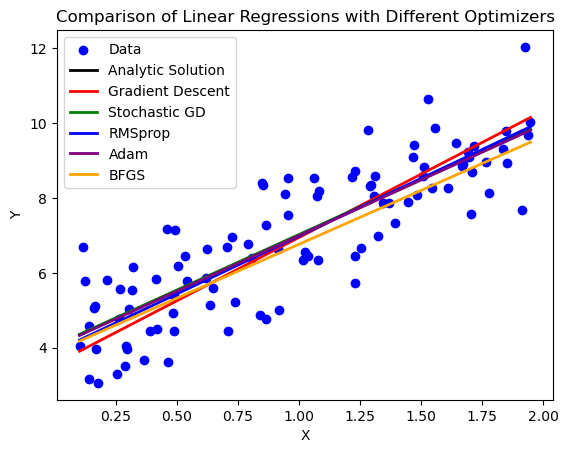

In [16]:
# Define the number of examples
m_examples = 100

# Define the true parameters for the data generation
b_true = 4
w_true = 3

# Define initial parameters (bias and weight) manually
theta_initial = np.array([[1.0], [1.0]])

# Define learning rate and number of iterations
learning_rate = 0.003
iterations = 1000

# Call the test function with all parameters defined
test_optimizers_with_plot(
    m_examples=m_examples,
    b_true=b_true,
    w_true=w_true,
    theta_initial=theta_initial,
    learning_rate=learning_rate,
    iterations=iterations
)

# OUTPUT:
# ===================================
# True Parameters (b, w):
# [[4]
#  [3]]
# ===================================

# Theoretical Parameters (b, w):
# [[3.92885763]
#  [2.96828658]]
# ===================================

# Initial Parameters (b, w):
# [[1.]
#  [1.]]
# ===================================

# Method                             Optimized Theta (b,w)              MSE                 MAE                 
# ==============================================================================================================
# Gradient Descent                   [3.42722332 3.3730721 ]            1.01286             0.83205             
# Stochastic Gradient Descent        [3.94995362 2.96897083]            0.94919             0.80129             
# RMSprop                            [3.86886757 3.01214773]            0.94960             0.80038             
# Adam                               [3.93153562 2.97826822]            0.94892             0.80105             
# BFGS for Least Squares             [3.78338963 2.87181673]            1.01220             0.80822 

# Not see the forest for the trees

## The importance of the initial point.

- Change the initial point and **get stuck in a local minima**.

True Parameters (b, w):
[[4]
 [3]]

Theoretical Parameters (b, w):
[[3.85865231]
 [3.14102351]]

Initial Parameters (b, w):
[[10.]
 [ 1.]]

Method                             Optimized Theta (b,w)              MSE                 MAE                 
Gradient Descent                   [6.62754497 0.63973657]            3.31914             1.47108             
Stochastic Gradient Descent        [3.81444903 3.181534  ]            1.12461             0.82673             
RMSprop                            [7.01535015 0.66138281]            3.81310             1.59085             
Adam                               [3.86506824 3.1446181 ]            1.12414             0.82612             
BFGS for Least Squares             [4.16582557 3.03144203]            1.17002             0.84379             


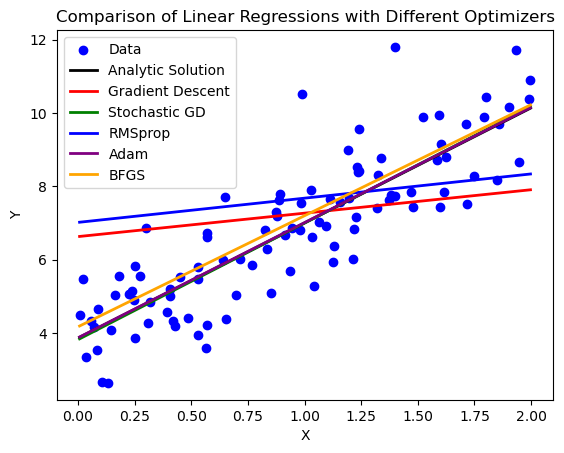

In [21]:
# Define the number of examples
m_examples = 100

# Define initial parameters (bias and weight) manually
theta_initial = np.array([[10.0], [1.0]])

# Define learning rate and number of iterations
learning_rate = 0.003
iterations = 1000

# Call the test function with all parameters defined
test_optimizers_with_plot(
    m_examples=m_examples,
    b_true=b_true,
    w_true=w_true,
    theta_initial=theta_initial,
    learning_rate=learning_rate,
    iterations=iterations
)

True Parameters (b, w):
[[4]
 [3]]

Theoretical Parameters (b, w):
[[3.95919919]
 [2.97896214]]

Initial Parameters (b, w):
[[10.]
 [10.]]

Method                             Optimized Theta (b,w)              MSE                 MAE                 
Gradient Descent                   [4.05465498 2.91488279]            0.84931             0.73678             
Stochastic Gradient Descent        [3.9969692  2.96195144]            0.84741             0.73862             
RMSprop                            [6.98899594 6.98874358]            56.98644            7.09144             
Adam                               [3.96679248 2.98235633]            0.84701             0.73991             
BFGS for Least Squares             [4.25764299 3.32553976]            1.31245             0.90292             


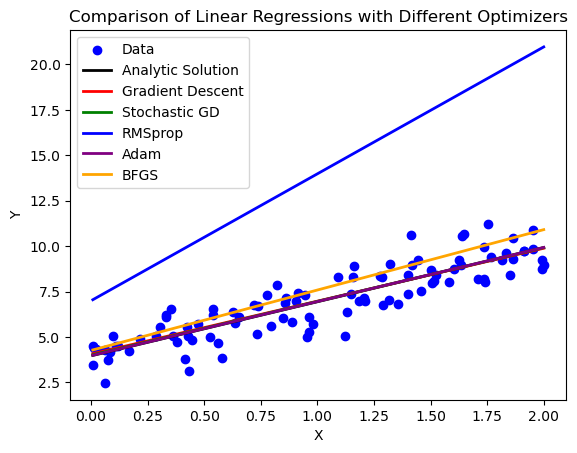

In [22]:
# Define the number of examples
m_examples = 100

# Define initial parameters (bias and weight) manually
theta_initial = np.array([[10.0], [10.0]])

# Define learning rate and number of iterations
learning_rate = 0.003
iterations = 1000

# Call the test function with all parameters defined
test_optimizers_with_plot(
    m_examples=m_examples,
    b_true=b_true,
    w_true=w_true,
    theta_initial=theta_initial,
    learning_rate=learning_rate,
    iterations=iterations
)

## The importance of the learning rate.

- Good learning rate makes things to converge.

True Parameters (b, w):
[[4]
 [3]]

Theoretical Parameters (b, w):
[[3.86056695]
 [3.03193795]]

Initial Parameters (b, w):
[[1.]
 [1.]]

Method                             Optimized Theta (b,w)              MSE                 MAE                 
Gradient Descent                   [3.81915151 3.06587988]            1.10872             0.85293             
Stochastic Gradient Descent        [3.85122859 3.1002039 ]            1.11368             0.85814             
RMSprop                            [3.8705669  3.04193791]            1.10876             0.85437             
Adam                               [3.90745821 3.06444958]            1.11520             0.85937             
BFGS for Least Squares             [3.86056695 3.03193794]            1.10831             0.85309             


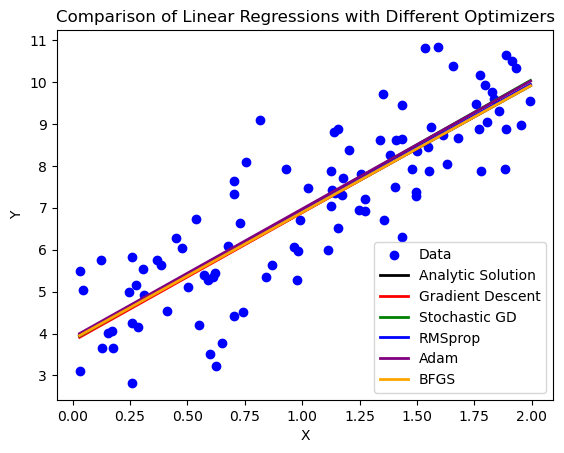

In [26]:
# Define the number of examples
m_examples = 100

# Define initial parameters (bias and weight) manually
theta_initial = np.array([[1.0], [1.0]])

# Define learning rate and number of iterations
learning_rate = 0.02
iterations = 1000

# Call the test function with all parameters defined
test_optimizers_with_plot(
    m_examples=m_examples,
    b_true=b_true,
    w_true=w_true,
    theta_initial=theta_initial,
    learning_rate=learning_rate,
    iterations=iterations
)

- Very small. **Stuck in a local minima**.

True Parameters (b, w):
[[4]
 [3]]

Theoretical Parameters (b, w):
[[4.12376046]
 [2.95451183]]

Initial Parameters (b, w):
[[1.]
 [1.]]

Method                             Optimized Theta (b,w)              MSE                 MAE                 
Gradient Descent                   [1.83495466 1.9840575 ]            12.45421            3.31031             
Stochastic Gradient Descent        [4.06358392 2.98699304]            1.14937             0.85830             
RMSprop                            [1.20168092 1.20167568]            25.00826            4.76712             
Adam                               [4.07730936 2.99165091]            1.14887             0.85915             
BFGS for Least Squares             [1.56587175 1.35563654]            20.07725            4.24087             


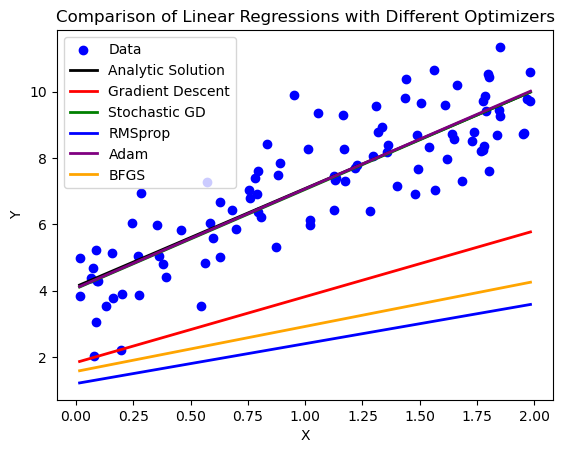

In [27]:
# Define the number of examples
m_examples = 100

# Define initial parameters (bias and weight) manually
theta_initial = np.array([[1.0], [1.0]])

# Define learning rate and number of iterations
learning_rate = 0.0002
iterations = 1000

# Call the test function with all parameters defined
test_optimizers_with_plot(
    m_examples=m_examples,
    b_true=b_true,
    w_true=w_true,
    theta_initial=theta_initial,
    learning_rate=learning_rate,
    iterations=iterations
)

- Very big. **Bad Results**. Probably zigzaging.

True Parameters (b, w):
[[4]
 [3]]

Theoretical Parameters (b, w):
[[3.93713783]
 [3.12212799]]

Initial Parameters (b, w):
[[1.]
 [1.]]

Method                             Optimized Theta (b,w)              MSE                 MAE                 
Gradient Descent                   [3.10464599 3.32191699]            1.26401             0.88969             
Stochastic Gradient Descent        [3.91510783 3.13292342]            0.85683             0.75886             
RMSprop                            [2.00464814 2.00452218]            10.69527            3.07405             
Adam                               [3.93498209 3.12133544]            0.85668             0.75813             
BFGS for Least Squares             [2.8565454 2.344425 ]              4.56044             1.87986             


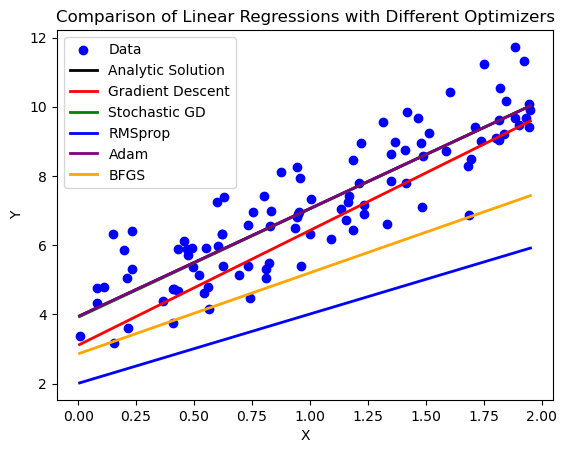

In [47]:
# Define the number of examples
m_examples = 100

# Define initial parameters (bias and weight) manually
theta_initial = np.array([[1.0], [1.0]])

# Define learning rate and number of iterations
learning_rate = 0.001
iterations = 1000

# Call the test function with all parameters defined
test_optimizers_with_plot(
    m_examples=m_examples,
    b_true=b_true,
    w_true=w_true,
    theta_initial=theta_initial,
    learning_rate=learning_rate,
    iterations=iterations
)

## The importance of the number of iterations.

- We do not see convergence with a small number of iterations.

True Parameters (b, w):
[[4]
 [3]]

Theoretical Parameters (b, w):
[[4.02255616]
 [2.9877156 ]]

Initial Parameters (b, w):
[[1.]
 [1.]]

Method                             Optimized Theta (b,w)              MSE                 MAE                 
Gradient Descent                   [1.14577979 1.16416891]            24.08214            4.69098             
Stochastic Gradient Descent        [3.48701389 3.44789824]            1.04468             0.82128             
RMSprop                            [1.05181421 1.05180853]            26.19567            4.89673             
Adam                               [3.06286409 2.70654737]            2.53055             1.33804             
BFGS for Least Squares             [1.08623639 1.07727148]            25.58138            4.83698             


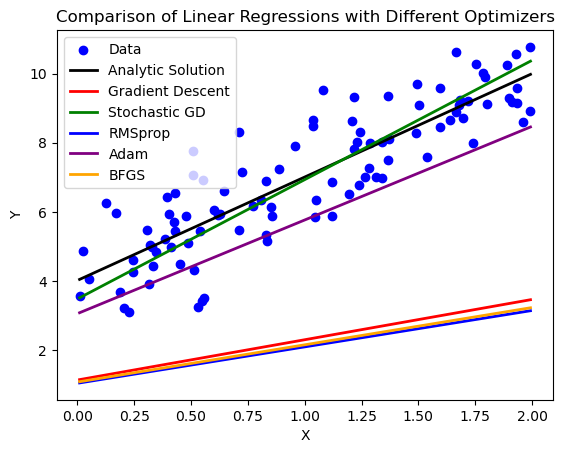

In [49]:
# Define the number of examples
m_examples = 100

# Define the true parameters for the data generation
b_true = 4
w_true = 3

# Define initial parameters (bias and weight) manually
theta_initial = np.array([[1.0], [1.0]])

# Define learning rate and number of iterations
learning_rate = 0.003
iterations = 10

# Call the test function with all parameters defined
test_optimizers_with_plot(
    m_examples=m_examples,
    b_true=b_true,
    w_true=w_true,
    theta_initial=theta_initial,
    learning_rate=learning_rate,
    iterations=iterations
)

In [ ]:
- With more the results improve.

True Parameters (b, w):
[[4]
 [3]]

Theoretical Parameters (b, w):
[[4.04849642]
 [2.86531511]]

Initial Parameters (b, w):
[[1.]
 [1.]]

Method                             Optimized Theta (b,w)              MSE                 MAE                 
Gradient Descent                   [2.09709291 2.25633393]            8.02890             2.58586             
Stochastic Gradient Descent        [4.09203544 2.87123878]            1.23980             0.90816             
RMSprop                            [1.32417458 1.32405276]            20.70936            4.31862             
Adam                               [4.03505112 2.8903425 ]            1.23769             0.90735             
BFGS for Least Squares             [1.78489238 1.50167646]            15.37993            3.67416             


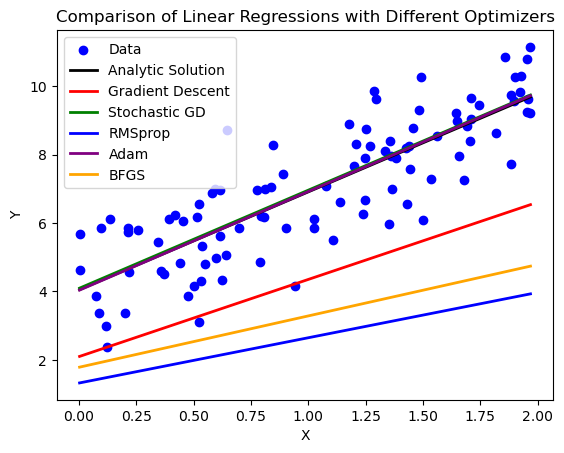

In [50]:
# Define the number of examples
m_examples = 100

# Define the true parameters for the data generation
b_true = 4
w_true = 3

# Define initial parameters (bias and weight) manually
theta_initial = np.array([[1.0], [1.0]])

# Define learning rate and number of iterations
learning_rate = 0.003
iterations = 100

# Call the test function with all parameters defined
test_optimizers_with_plot(
    m_examples=m_examples,
    b_true=b_true,
    w_true=w_true,
    theta_initial=theta_initial,
    learning_rate=learning_rate,
    iterations=iterations
)

- With more we converge.

True Parameters (b, w):
[[4]
 [3]]

Theoretical Parameters (b, w):
[[3.94556769]
 [3.00804358]]

Initial Parameters (b, w):
[[1.]
 [1.]]

Method                             Optimized Theta (b,w)              MSE                 MAE                 
Gradient Descent                   [3.47514712 3.40458432]            1.11958             0.85578             
Stochastic Gradient Descent        [3.96306698 3.00536646]            1.06759             0.82973             
RMSprop                            [3.87132087 3.06646093]            1.06863             0.83074             
Adam                               [3.95014753 3.02515864]            1.06793             0.82963             
BFGS for Least Squares             [3.79925286 2.90959915]            1.13048             0.85990             


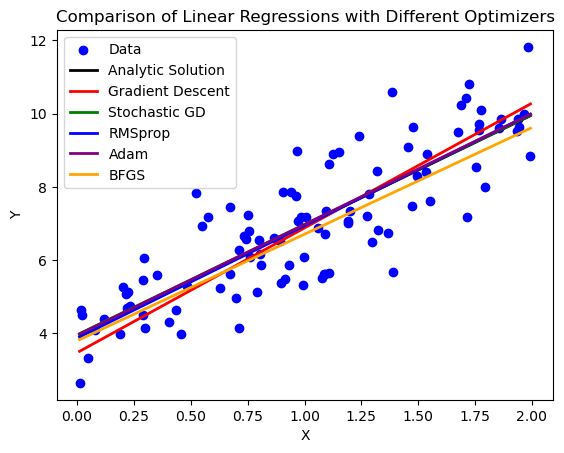

In [52]:
# Define the number of examples
m_examples = 100

# Define the true parameters for the data generation
b_true = 4
w_true = 3

# Define initial parameters (bias and weight) manually
theta_initial = np.array([[1.0], [1.0]])

# Define learning rate and number of iterations
learning_rate = 0.003
iterations = 1000

# Call the test function with all parameters defined
test_optimizers_with_plot(
    m_examples=m_examples,
    b_true=b_true,
    w_true=w_true,
    theta_initial=theta_initial,
    learning_rate=learning_rate,
    iterations=iterations
)